Join the data from Part 1 with the data from Part 2 to create a new dataframe.

#### Import libraries

In [1]:
import pandas as pd
import sqlite3
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#### Step 1: Import CSV files from CityBikes, Yelp, and FourSquare

In [3]:
# load CityBikes dataframe
city_bikes_df = pd.read_csv('/Users/brittanyharding/LHL-Projects/Statistical-Modelling-with-Python/notebooks/London_CityBikes_Data.csv')

# load Yelp parks dataframe
yelp_parks_df = pd.read_csv('/Users/brittanyharding/LHL-Projects/Statistical-Modelling-with-Python/notebooks/yelp_parks_df.csv')

# load Yelp restaurants dataframe
yelp_restaurants_df = pd.read_csv('/Users/brittanyharding/LHL-Projects/Statistical-Modelling-with-Python/notebooks/yelp_restaurants_df.csv')

# load Foursquare parks dataframe
foursquare_parks_df = pd.read_csv('/Users/brittanyharding/LHL-Projects/Statistical-Modelling-with-Python/notebooks/foursquare_parks_df.csv')

# load FourSquare restaurants dataframe
foursquare_restaurants_df = pd.read_csv('/Users/brittanyharding/LHL-Projects/Statistical-Modelling-with-Python/notebooks/foursquare_restaurants_df.csv')




In [4]:
#Adding Type descriptive labels to differentiate the data when combined (as categories and poi type does not provide uniform type names)
yelp_parks_df['Type'] = 'Park'
yelp_restaurants_df['Type'] = 'Restaurant'
foursquare_restaurants_df['Type'] = 'Restaurant'
foursquare_parks_df['Type'] = 'Park'

### Step 2: Merge DataFrames Together

In [5]:
# merge Yelp DataFrames based on the location column
merged_yelp_df = pd.concat([yelp_parks_df, yelp_restaurants_df], axis=0)

# merge FourSquare DataFrames based on the location column
merged_foursquare_df = pd.concat([foursquare_parks_df, foursquare_restaurants_df], axis=0)

#rename CityBikes 'name' column to 'location' to be able to perform merge
city_bikes_df = city_bikes_df.rename(columns={'name': 'location'})

# merge Foursquare and CityBikes DataFrames based on the location column (left-join)
merged_yelp_citybikes = pd.merge(merged_yelp_df, city_bikes_df, on='location', how='left')

# merge Foursquare and CityBikes DataFrames based on the location column (left-join)
merged_foursquare_citybikes = pd.merge(merged_foursquare_df, city_bikes_df, on='location', how='left')

In [6]:
# #Removing id and fsq_id, as they do not add to the data
merged_yelp_citybikes = merged_yelp_citybikes.drop('id', axis=1)
merged_foursquare_citybikes = merged_foursquare_citybikes.drop('fsq_id', axis=1)


In [7]:
# export yelp/citybikes DataFrame to Csv file
merged_yelp_citybikes.to_csv('merged_yelp_citybikes.csv', index=False)

# export foursquare/citybikes DataFrame to Csv file
merged_foursquare_citybikes.to_csv('merged_foursquare_citybikes.csv', index=False)

# load merged_yelp_citybikes dataframe
yelp_citybikes = pd.read_csv('/Users/brittanyharding/LHL-Projects/Statistical-Modelling-with-Python/notebooks/merged_yelp_citybikes.csv')

# load foursquare/citybikes DataFrame parks dataframe
foursquare_citybikes = pd.read_csv('/Users/brittanyharding/LHL-Projects/Statistical-Modelling-with-Python/notebooks/merged_foursquare_citybikes.csv')

In [8]:
#Calculating number of parks on Yelp in 1000m radius of CityBike locations
num_parks_per_location_yelp = yelp_parks_df.groupby(['location'])['Type'].count().reset_index(name='num_parks')


#Calculating number of parks in 1000m radius of CityBike locations
num_parks_per_location_foursquare = foursquare_citybikes.groupby(['location'])['Type'].count().reset_index(name='num_parks')

#Calculating number of restaurants on Yelp in 1000m radius of CityBike locations
num_restaurants_per_location_yelp = yelp_citybikes.groupby(['location'])['Type'].count().reset_index(name='num_restaurants')

#Calculating number of restaurants in 1000m radius of CityBike locations
num_restaurants_per_location_foursquare = foursquare_citybikes.groupby(['location'])['Type'].count().reset_index(name='num_restaurants')


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

poi_counts = df.groupby(['name', 'location']).count()['categories'].reset_index()
poi_counts = poi_counts.rename(columns={'categories': 'poi_count'})

In [10]:
# Create a new dataframe for heatmap data
heatmap_data = pd.DataFrame({'location': num_parks_per_location_yelp['location'], 'num_parks': num_parks_per_location_yelp['num_parks']})
heatmap_data = heatmap_data.dropna() # Drop rows with missing values
heatmap_data = heatmap_data.fillna(0) # Fill remaining missing values with 0

# Create the heatmap using seaborn library
sns.set()
heatmap_matrix = heatmap_data.pivot(index='location', columns=None, values='num_parks', dropna=False)
sns.heatmap(heatmap_matrix, cmap='YlOrRd')
plt.title('Number of Parks within 1000m of CityBike Locations')
plt.xlabel('Number of parks')
plt.ylabel('Location')
plt.show()



TypeError: DataFrame.pivot() got an unexpected keyword argument 'dropna'

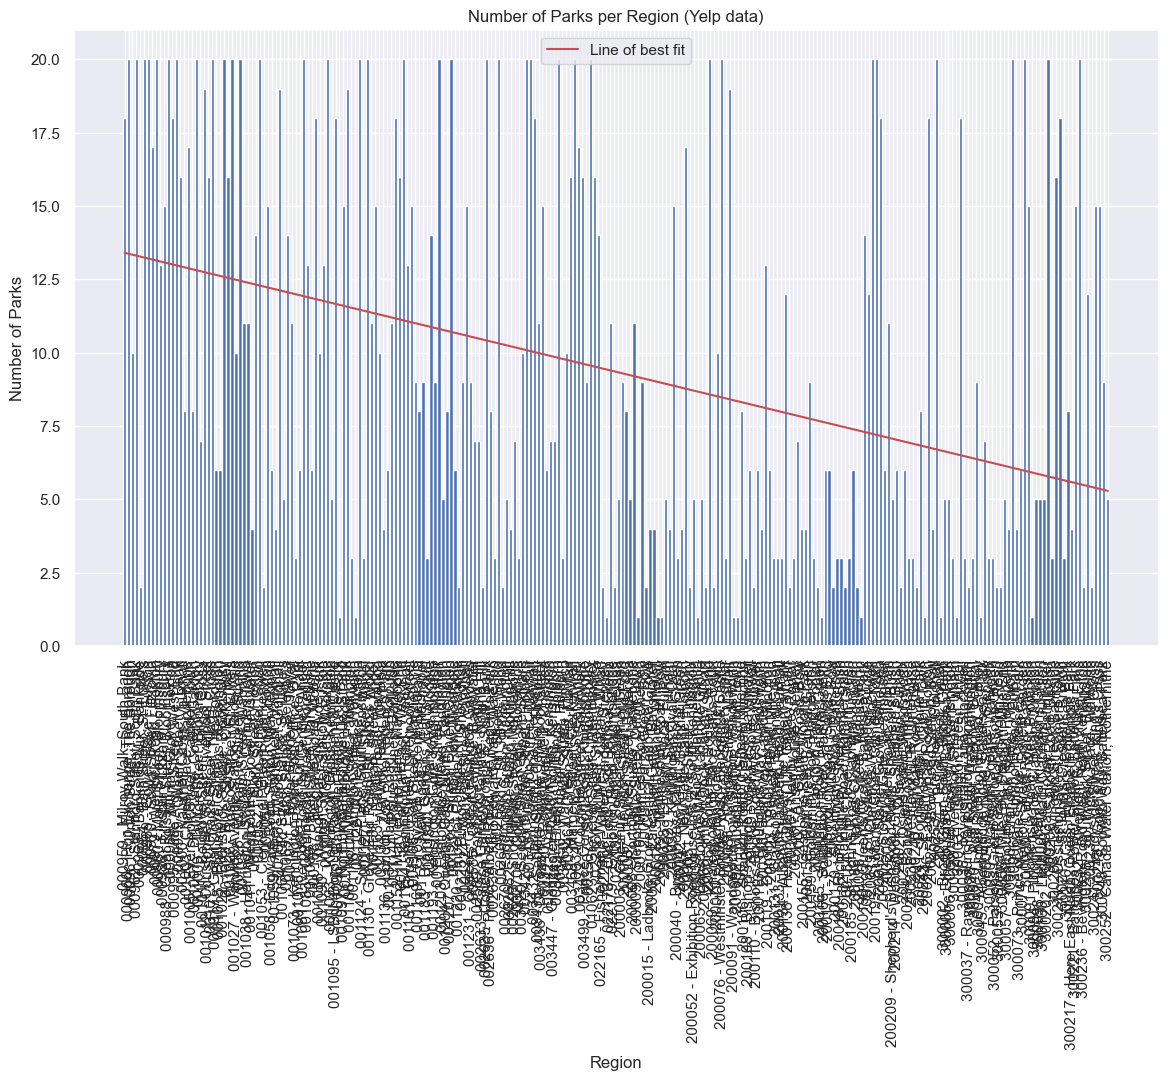

In [12]:
import numpy as np
from scipy import stats

#Calculating number of parks on Yelp in 1000m radius of CityBike locations
num_parks_per_location_yelp = yelp_parks_df.groupby(['location'])['Type'].count().reset_index(name='num_parks')

#Plotting bar chart
plt.figure(figsize=(14,8))
plt.bar(num_parks_per_location_yelp['location'], num_parks_per_location_yelp['num_parks'])
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Number of Parks')
plt.title('Number of Parks per Region (Yelp data)')

#Adding line of best fit
x = np.arange(len(num_parks_per_location_yelp))
y = num_parks_per_location_yelp['num_parks']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
plt.plot(x, intercept + slope*x, 'r', label='Line of best fit')
plt.legend()

plt.show()


# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

Look at the data before and after the join to validate your data.